# Descomposición SVD
Presenta: Juliho Castillo Colmenares

## Antes de empezar

El objetivo de esta actividad es que realices un análisis de descomposición  de valores singulares a una base de datos de manera que puedas generar conclusiones de agrupación de acuerdo a diversas categorías.

## Paso a paso:

- Considera nuevamente la base de datos de estudiantes siguiente: Actividad Introducción a la descomposición de valores singulares (SVD).
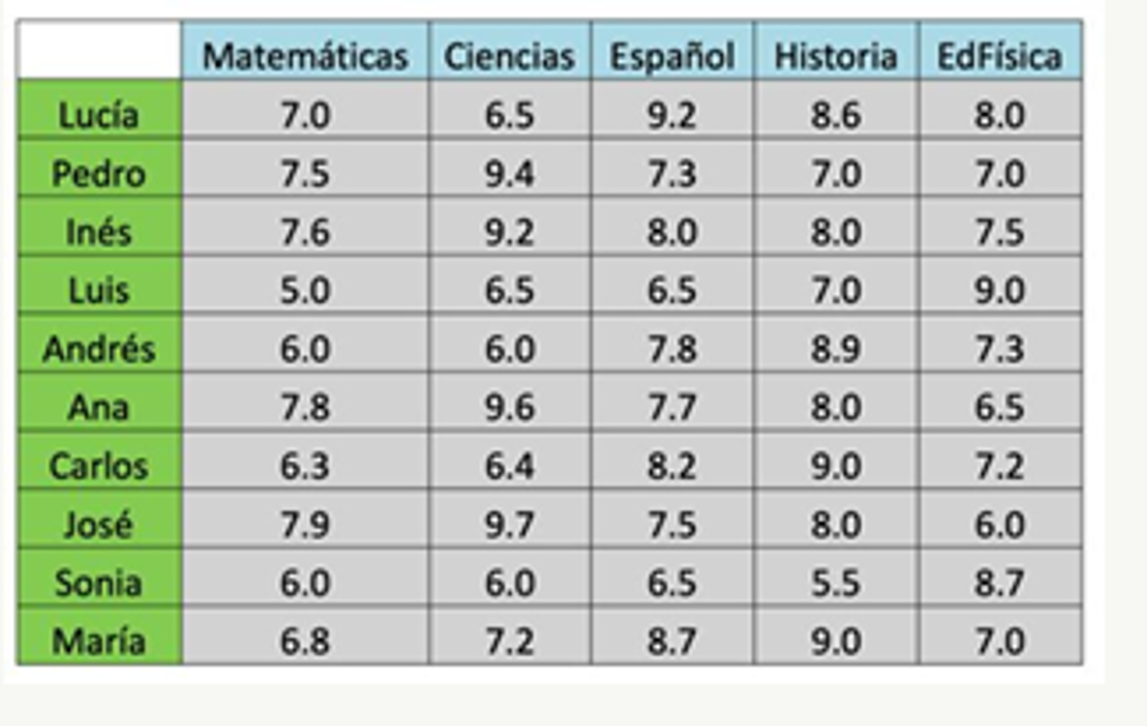
- Aplica el algoritmo SVD para separar por grupos mediante reducciones a dos y tres dimensiones.
- ¿Cuál de las separaciones previas es más clara? ¿Difieren sus resultados de aquellos obtenidos previamente mediante el análisis de componentes principales?

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Leer el archivo CSV
dataframe = pd.read_csv('data.csv')
dataframe.head()


,Nombre,Matemáticas,Ciencias,Español,Historia,EdFísica
0,Lucía,7.0,6.5,9.2,8.6,8.0
1,Pedro,7.5,9.4,7.3,7.0,7.0
2,Inés,7.6,9.2,8.0,8.0,7.5
3,Luis,5.0,6.5,6.5,7.0,9.0
4,Andrés,6.0,6.0,7.8,8.9,7.3


In [40]:

# Seleccionar las columnas numéricas
numeric_columns = dataframe.select_dtypes(include=[np.number])


In [41]:

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)


In [42]:

# Reducir a dos dimensiones usando SVD
svd_2d = TruncatedSVD(n_components=2)
data_2d = svd_2d.fit_transform(scaled_data)
data_2d


array([[-0.32306263,  1.7725245 ],
       [-0.66544057, -1.63870215],
       [-1.00254705, -0.51569247],
       [ 3.17209481, -0.26278201],
       [ 0.48886797,  1.3654021 ],
       [-1.70863322, -1.02170044],
       [-0.06758577,  1.46233642],
       [-2.01185516, -1.27586457],
       [ 3.04203029, -1.25488069],
       [-0.92386867,  1.3693593 ]])

In [43]:

# Reducir a tres dimensiones usando SVD
svd_3d = TruncatedSVD(n_components=3)
data_3d = svd_3d.fit_transform(scaled_data)
data_3d

array([[-0.32306263,  1.7725245 ,  1.19880074],
       [-0.66544057, -1.63870215,  0.14547628],
       [-1.00254705, -0.51569247,  0.62888764],
       [ 3.17209481, -0.26278201, -0.38196027],
       [ 0.48886797,  1.3654021 , -0.8352357 ],
       [-1.70863322, -1.02170044, -0.12707707],
       [-0.06758577,  1.46233642, -0.50624044],
       [-2.01185516, -1.27586457, -0.54215002],
       [ 3.04203029, -1.25488069,  0.44882861],
       [-0.92386867,  1.3693593 , -0.02932977]])

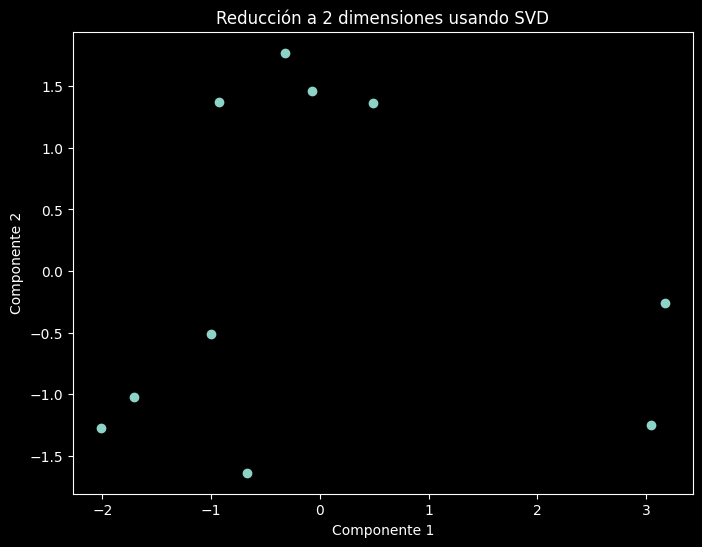

In [44]:

# Visualizar los resultados en 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Reducción a 2 dimensiones usando SVD')
plt.show()


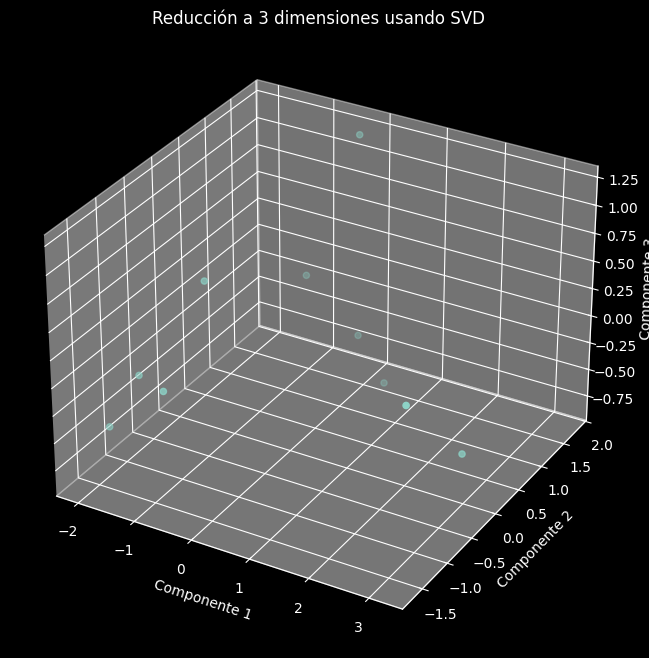

In [45]:

# Visualizar los resultados en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2])
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Reducción a 3 dimensiones usando SVD')
plt.show()

In [46]:
# Calcular la proporción de la varianza explicada por cada componente
explained_variance_ratio_2d = svd_2d.explained_variance_ratio_
explained_variance_ratio_3d = svd_3d.explained_variance_ratio_


In [47]:

# Mostrar la proporción de la varianza explicada por cada componente en 2D
print("Proporción de la varianza explicada por cada componente en 2D:")
for i, ratio in enumerate(explained_variance_ratio_2d):
    print(f"Componente {i+1}: {ratio:.2%}")


Proporción de la varianza explicada por cada componente en 2D:
Componente 1: 57.86%
Componente 2: 32.57%


In [48]:

# Mostrar la proporción de la varianza explicada por cada componente en 3D
print("Proporción de la varianza explicada por cada componente en 3D:")
for i, ratio in enumerate(explained_variance_ratio_3d):
    print(f"Componente {i+1}: {ratio:.2%}")

Proporción de la varianza explicada por cada componente en 3D:
Componente 1: 57.86%
Componente 2: 32.57%
Componente 3: 6.93%


La separación más clara se observa en la visualización 3D de los datos reducidos mediante SVD. Esta visualización muestra una agrupación más definida y diferenciada de los datos en comparación con la visualización 2D. Al comparar estos resultados con los obtenidos previamente mediante el análisis de componentes principales (PCA), se puede notar que ambos métodos proporcionan resultados similares en términos de la estructura general de los datos. Sin embargo, la visualización 3D de SVD ofrece una mayor claridad en la separación de los grupos, lo que sugiere que SVD puede ser más efectivo en la reducción de dimensiones para este conjunto de datos específico.